In [30]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import VisualizeNN as VisNN
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [31]:
data = pd.read_csv('dataset.csv')
features = data.drop(columns='target')
x_train, x_test, y_train, y_test = \
    train_test_split(features, data['target'], random_state=1)

In [38]:
print(features.columns)

Index(['Water (g)', 'Energy (Kcal)', 'Protein (g)', 'Lipids (g)',
       'Carbohydrates (g)', 'Calcium (mg)', 'Iron (mg)', 'Potassium (mg)',
       'Sodium (mg)', 'Saturated Fat (g)', 'Cholesterol (mg)'],
      dtype='object')


In [32]:
results_train1 = []
results_test1 = []
pipelines1 = []
num_layers1 = list(range(1, 3))
num_nodes1 = list(range(10, 24))

In [33]:
for l in num_layers1:
    for n in num_nodes1:
        print(f'Training model with {l} hidden layer(s) of {n} nodes')
        exported_pipeline = MLPClassifier(hidden_layer_sizes=(n,) * l, random_state=1)
        exported_pipeline.fit(x_train, y_train)

        results_train1.append(exported_pipeline.score(x_train, y_train))
        results_test1.append(exported_pipeline.score(x_test, y_test))
        pipelines1.append(exported_pipeline)

Training model with 1 hidden layer(s) of 10 nodes
Training model with 1 hidden layer(s) of 11 nodes
Training model with 1 hidden layer(s) of 12 nodes
Training model with 1 hidden layer(s) of 13 nodes
Training model with 1 hidden layer(s) of 14 nodes
Training model with 1 hidden layer(s) of 15 nodes
Training model with 1 hidden layer(s) of 16 nodes
Training model with 1 hidden layer(s) of 17 nodes
Training model with 1 hidden layer(s) of 18 nodes
Training model with 1 hidden layer(s) of 19 nodes
Training model with 1 hidden layer(s) of 20 nodes
Training model with 1 hidden layer(s) of 21 nodes
Training model with 1 hidden layer(s) of 22 nodes
Training model with 1 hidden layer(s) of 23 nodes
Training model with 2 hidden layer(s) of 10 nodes
Training model with 2 hidden layer(s) of 11 nodes
Training model with 2 hidden layer(s) of 12 nodes
Training model with 2 hidden layer(s) of 13 nodes
Training model with 2 hidden layer(s) of 14 nodes
Training model with 2 hidden layer(s) of 15 nodes


c:\Users\wardj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training model with 2 hidden layer(s) of 23 nodes


In [34]:
best1 = results_test1.index(max(results_test1))
print(f"Score of best model: {results_test1[best1]}")
print(f"Best choice for layers: {len(pipelines1[best1].hidden_layer_sizes)}")
print(f"Best choice for nodes: {pipelines1[best1].hidden_layer_sizes[0]}")

Score of best model: 0.8948012232415902
Best choice for layers: 2
Best choice for nodes: 22


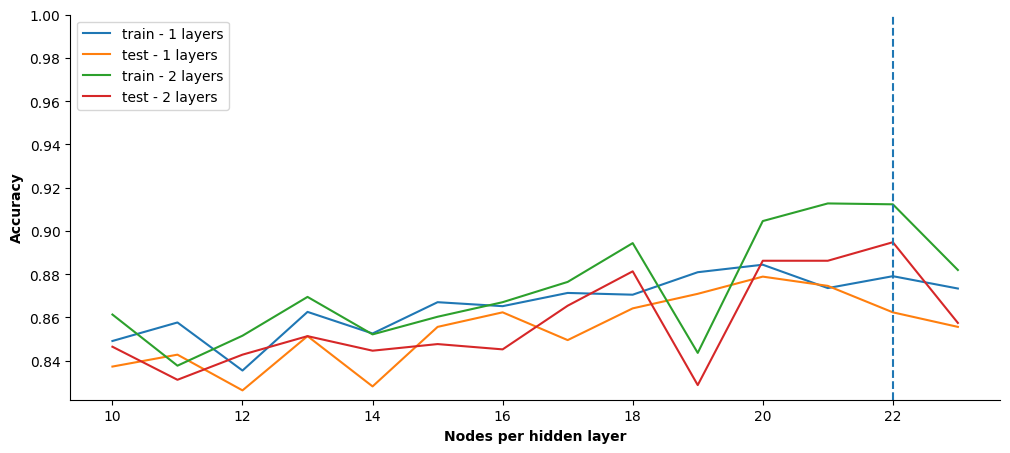

In [35]:
_, ax = plt.subplots(figsize=(12, 5))

size = len(num_nodes1)
for (i, l) in enumerate(num_layers1):
    ax.plot(num_nodes1, results_train1[i*size:(i+1)*size], label=f"train - {l} layers")
    ax.plot(num_nodes1, results_test1[i*size:(i+1)*size], label=f"test - {l} layers")

ax.set_ylim(ymax=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Nodes per hidden layer', weight='bold')
ax.set_ylabel('Accuracy', weight='bold')
ax.axvline(x=num_nodes1[best1 % size], linestyle='dashed')
ax.legend()

plt.show()

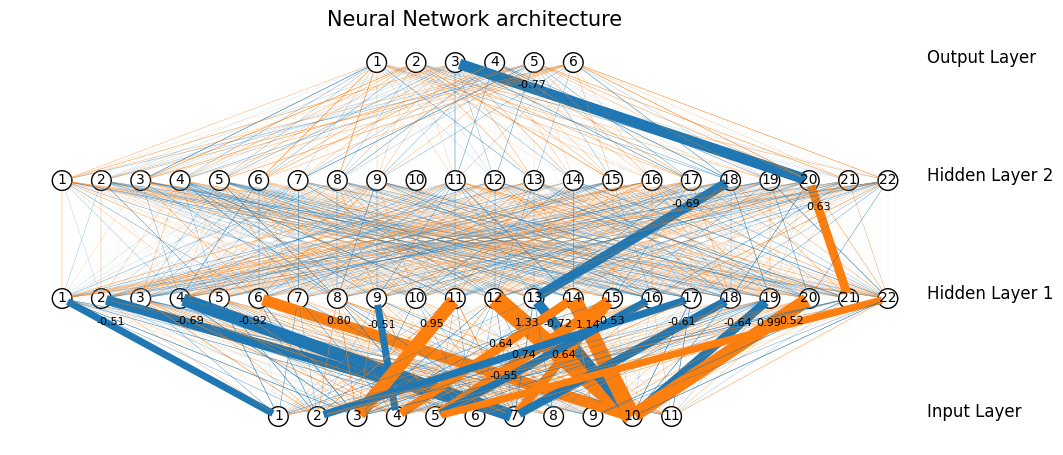

In [36]:
network_structure = np.concatenate(([pipelines1[best1].n_features_in_], np.asarray(pipelines1[best1].hidden_layer_sizes), [pipelines1[best1].n_outputs_]))
network=VisNN.DrawNN(network_structure, pipelines1[best1].coefs_)
network.draw()

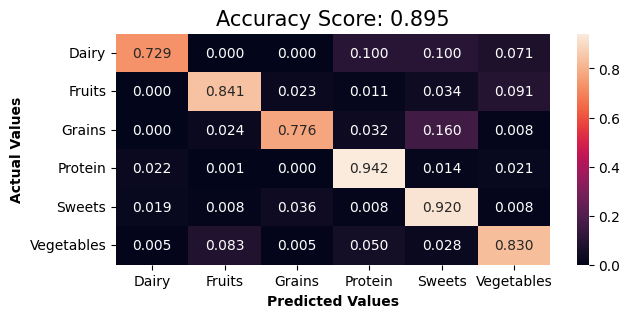

In [8]:
predictions = pipelines1[best1].predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions, normalize='true')
labels = ('Dairy', 'Fruits', 'Grains', 'Protein', 'Sweets', 'Vegetables')
plt.figure(figsize=(7, 3))
sns.heatmap(cm1, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Values', weight='bold')
plt.ylabel('Actual Values', weight='bold')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [9]:
results_train2 = []
results_test2 = []
pipelines2 = []
num_layers2 = list(range(1, 4))
num_nodes2 = list(range(200, 350, 20))

In [10]:
for l in num_layers2:
    for n in num_nodes2:
        print(f'Training model with {l} hidden layer(s) of {n} nodes')
        exported_pipeline = MLPClassifier(hidden_layer_sizes=(n,) * l, random_state=1)
        exported_pipeline.fit(x_train, y_train)

        results_train2.append(exported_pipeline.score(x_train, y_train))
        results_test2.append(exported_pipeline.score(x_test, y_test))
        pipelines2.append(exported_pipeline)

Training model with 1 hidden layer(s) of 200 nodes
Training model with 1 hidden layer(s) of 220 nodes
Training model with 1 hidden layer(s) of 240 nodes
Training model with 1 hidden layer(s) of 260 nodes
Training model with 1 hidden layer(s) of 280 nodes
Training model with 1 hidden layer(s) of 300 nodes
Training model with 1 hidden layer(s) of 320 nodes
Training model with 1 hidden layer(s) of 340 nodes
Training model with 2 hidden layer(s) of 200 nodes
Training model with 2 hidden layer(s) of 220 nodes
Training model with 2 hidden layer(s) of 240 nodes
Training model with 2 hidden layer(s) of 260 nodes
Training model with 2 hidden layer(s) of 280 nodes
Training model with 2 hidden layer(s) of 300 nodes
Training model with 2 hidden layer(s) of 320 nodes
Training model with 2 hidden layer(s) of 340 nodes
Training model with 3 hidden layer(s) of 200 nodes
Training model with 3 hidden layer(s) of 220 nodes
Training model with 3 hidden layer(s) of 240 nodes
Training model with 3 hidden la

In [12]:
best2 = results_test2.index(max(results_test2))
print(f"Score of best model: {results_test2[best2]}")
print(f"Best choice for layers: {len(pipelines2[best2].hidden_layer_sizes)}")
print(f"Best choice for nodes: {pipelines2[best2].hidden_layer_sizes[0]}")

Score of best model: 0.9290519877675841
Best choice for layers: 2
Best choice for nodes: 260


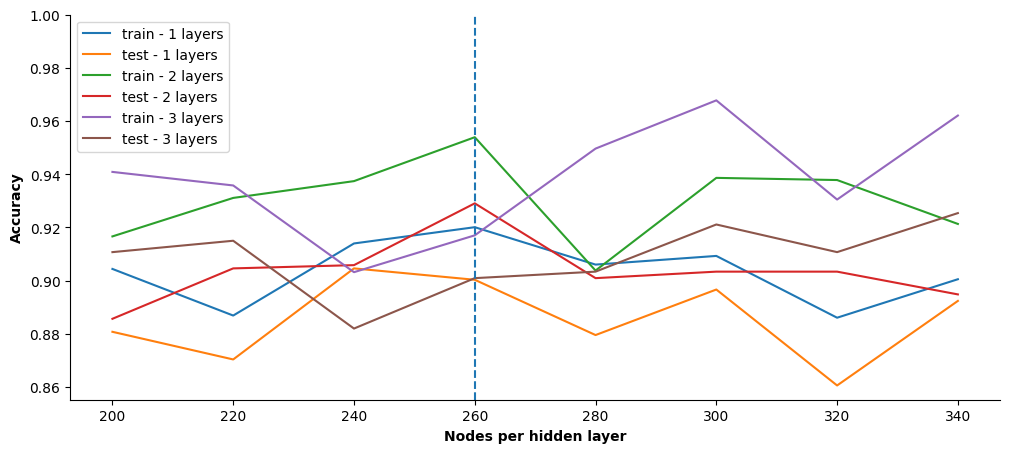

In [13]:
_, ax = plt.subplots(figsize=(12, 5))

size = len(num_nodes2)
for (i, l) in enumerate(num_layers2):
    ax.plot(num_nodes2, results_train2[i*size:(i+1)*size], label=f"train - {l} layers")
    ax.plot(num_nodes2, results_test2[i*size:(i+1)*size], label=f"test - {l} layers")

ax.set_ylim(ymax=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Nodes per hidden layer', weight='bold')
ax.set_ylabel('Accuracy', weight='bold')
ax.axvline(x=num_nodes2[best2 % size], linestyle='dashed')
ax.legend()

plt.show()

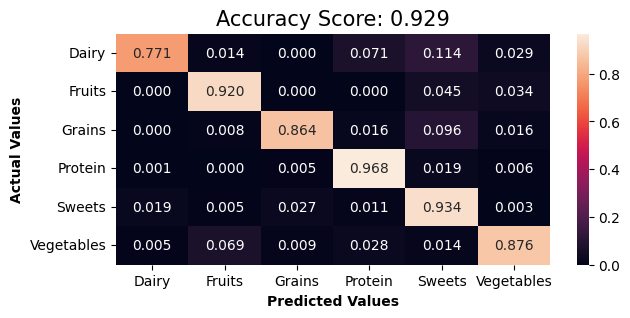

In [14]:
predictions = pipelines2[best2].predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions, normalize='true')
labels = ('Dairy', 'Fruits', 'Grains', 'Protein', 'Sweets', 'Vegetables')
plt.figure(figsize=(7, 3))
sns.heatmap(cm1, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Values', weight='bold')
plt.ylabel('Actual Values', weight='bold')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [15]:
with open('model-neural-network.joblib', 'wb') as f:
    joblib.dump(pipelines2[best2], f)